매장별로 메뉴 판매 개수 바 플롯 찍기

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 매장별 매뉴 판매 개수
menu_store_count = pd.read_csv('../../../resources/processedData/깐부치킨_매장별_메뉴_판매 개수.csv', encoding='UTF8')
# 메뉴 판매 매장 개수
store_count = pd.read_csv('../../../resources/processedData/깐부치킨_판매 매장 갯수.csv', encoding='UTF8')
# 메뉴별 총 판매개수
menu_whole_count = pd.read_csv('../../../resources/processedData/깐부치킨_메뉴별_총 판매 개수.csv', encoding='UTF8')

In [24]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


In [52]:
def barPlot(name, title, x, y):
    if name != "" :
         figTitle = title+ "_" + name
         width = 30
    else: 
         figTitle = title
         width = 60
        
    fig = plt.figure(figsize=(width, 10))
    plt.bar(x, y)
    plt.xticks(rotation=90, size = 15)
    plt.title(figTitle, fontsize=30)

    for i, v in enumerate(x) :
        plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 

    plt.gcf().subplots_adjust(bottom=0.60)

    plt.savefig("../../../resources/plot/" + figTitle + "_barplot.png")
    #plt.show()

In [50]:
menu_store_count

,상품명,판매단가,매장코드,매장명,판매개수
0,1000,1000,T50791,(주)깐부치킨(세곡점),215
1,1664블랑,9000,T06644,(주)깐부 청담본점,242
2,KGB레몬,8000,T79908,깐부치킨 신사가로수점,20
3,간사이오뎅탕,15000,T53532,깐부치킨 역삼본점,18
4,고추간장,8000,T88625,깐부치킨(도산사거리점),1
...,...,...,...,...,...
1797,후라이드양념,18500,T78908,깐부치킨(압구정한강고수부지),1
1798,후라이드양념,18500,T79908,깐부치킨 신사가로수점,11
1799,후라이드양념,18500,T86552,깐부치킨(한티점),3
1800,후라이드양념,18500,T88625,깐부치킨(도산사거리점),3


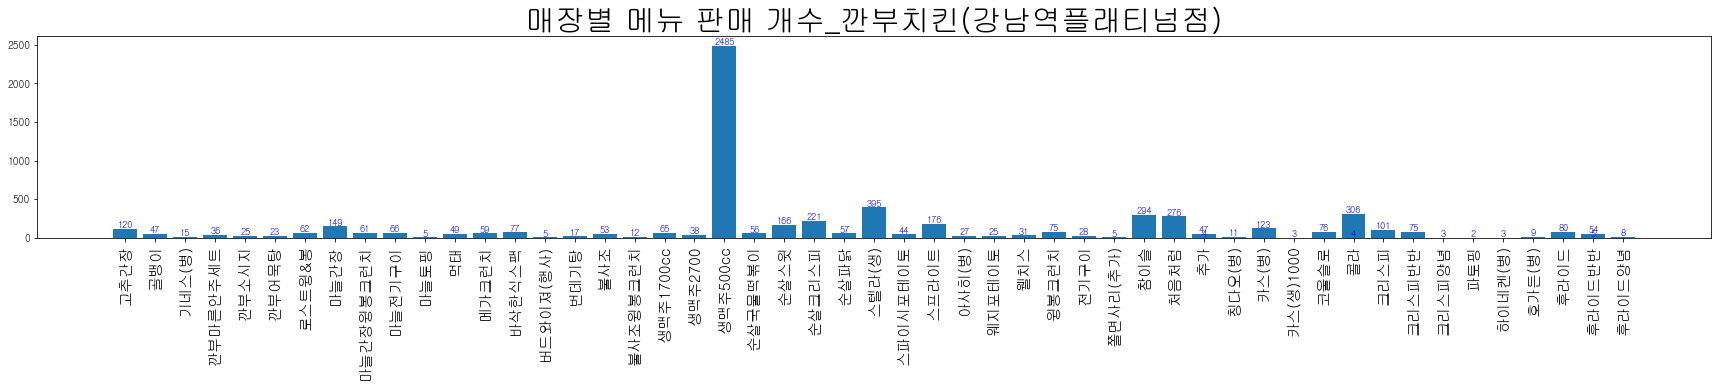

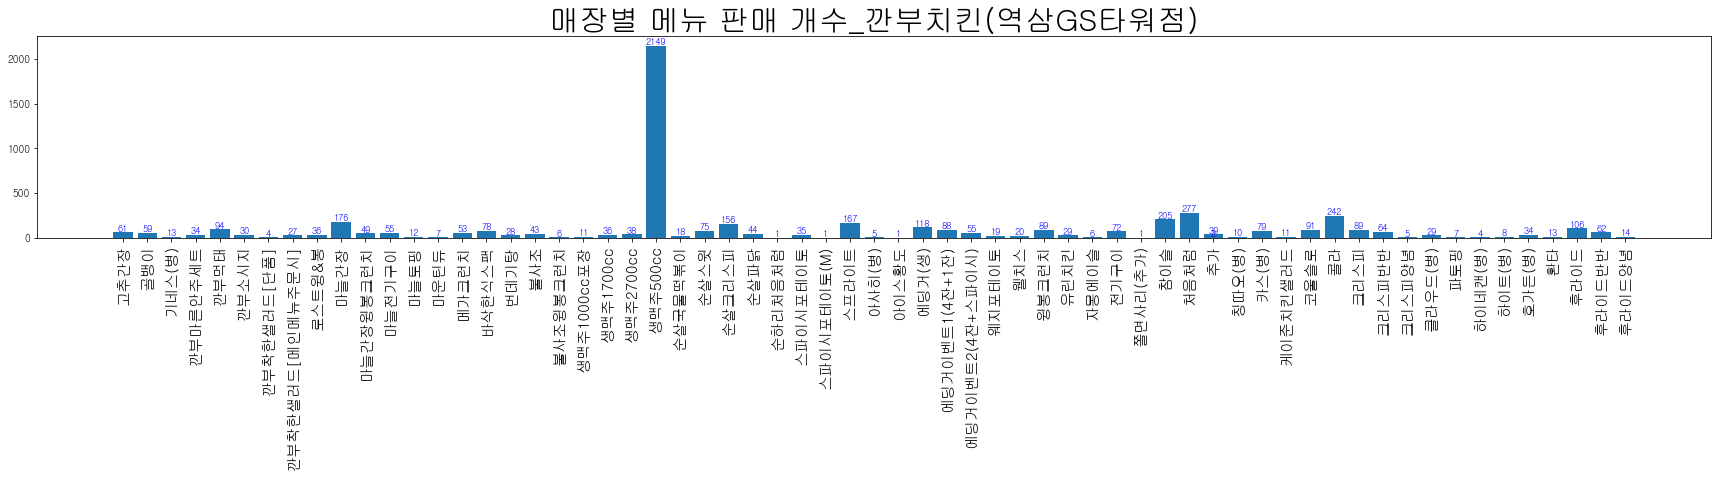

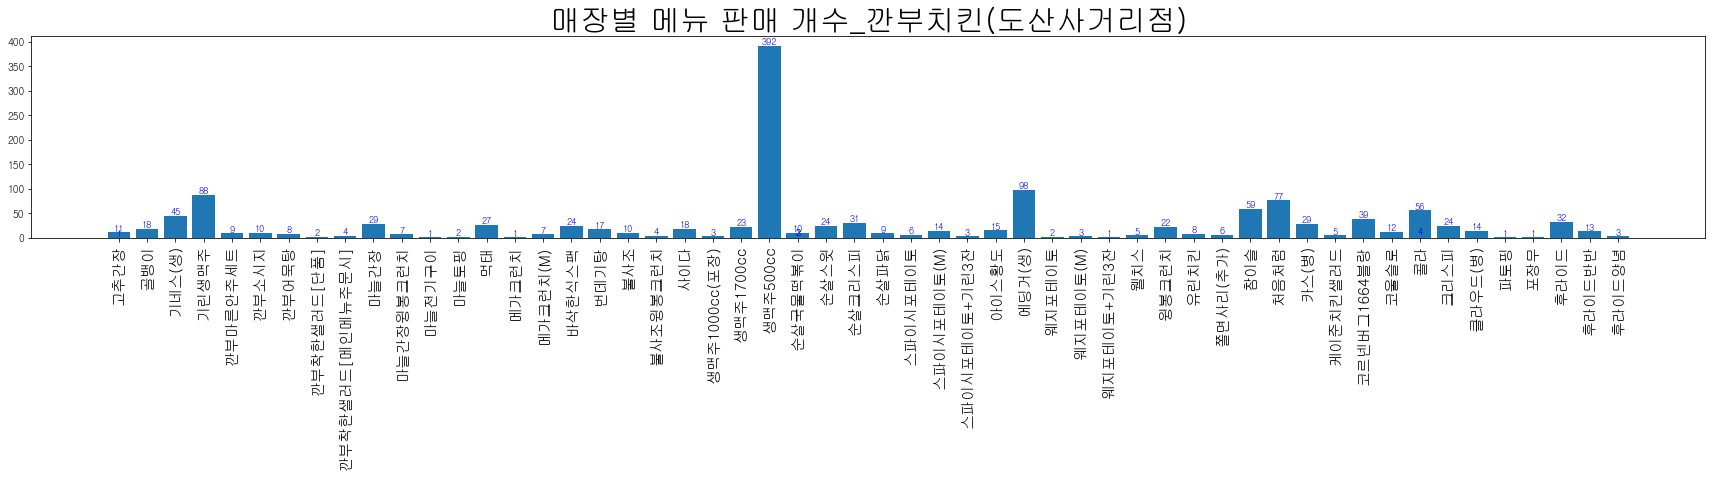

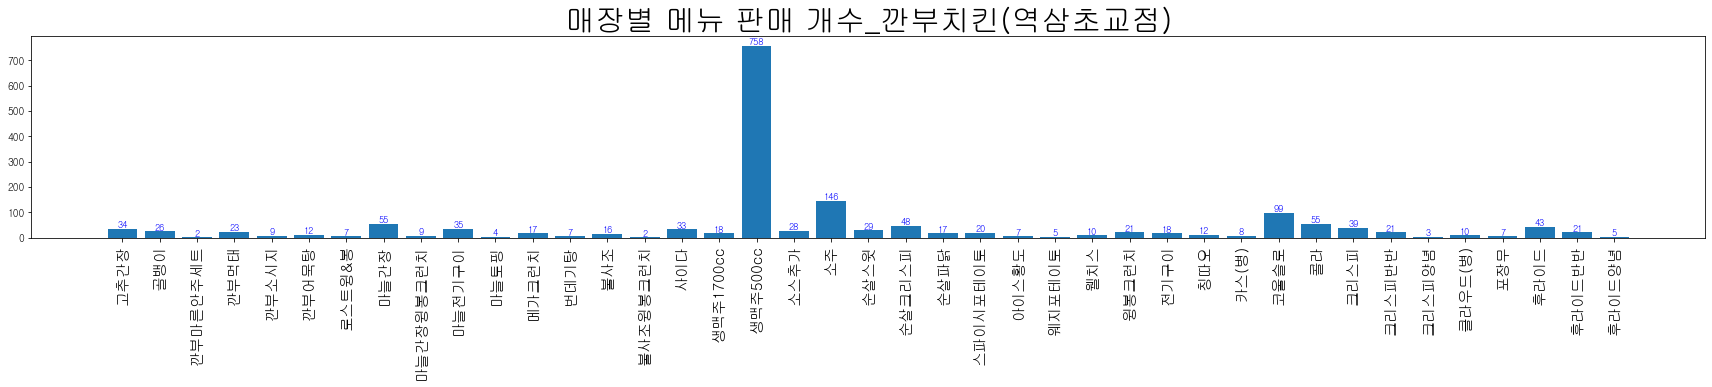

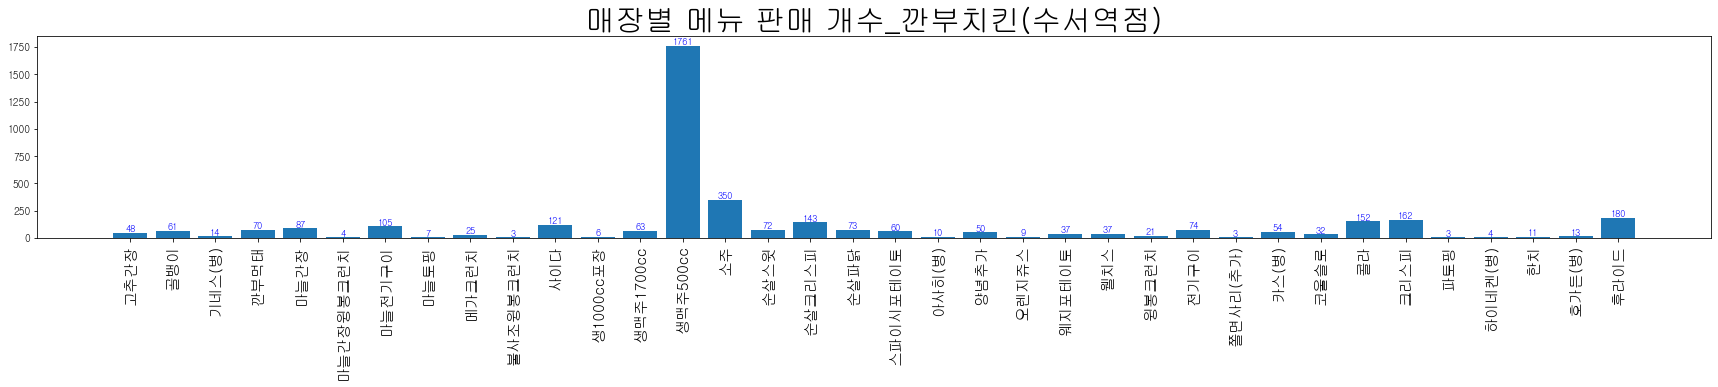

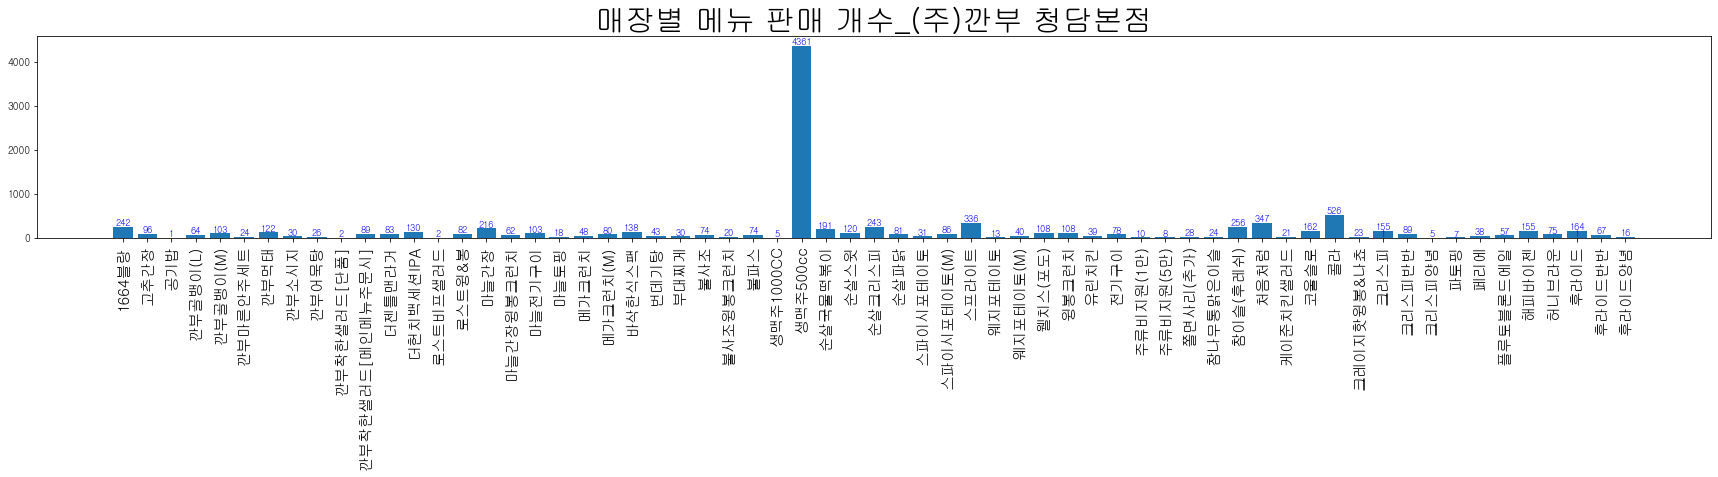

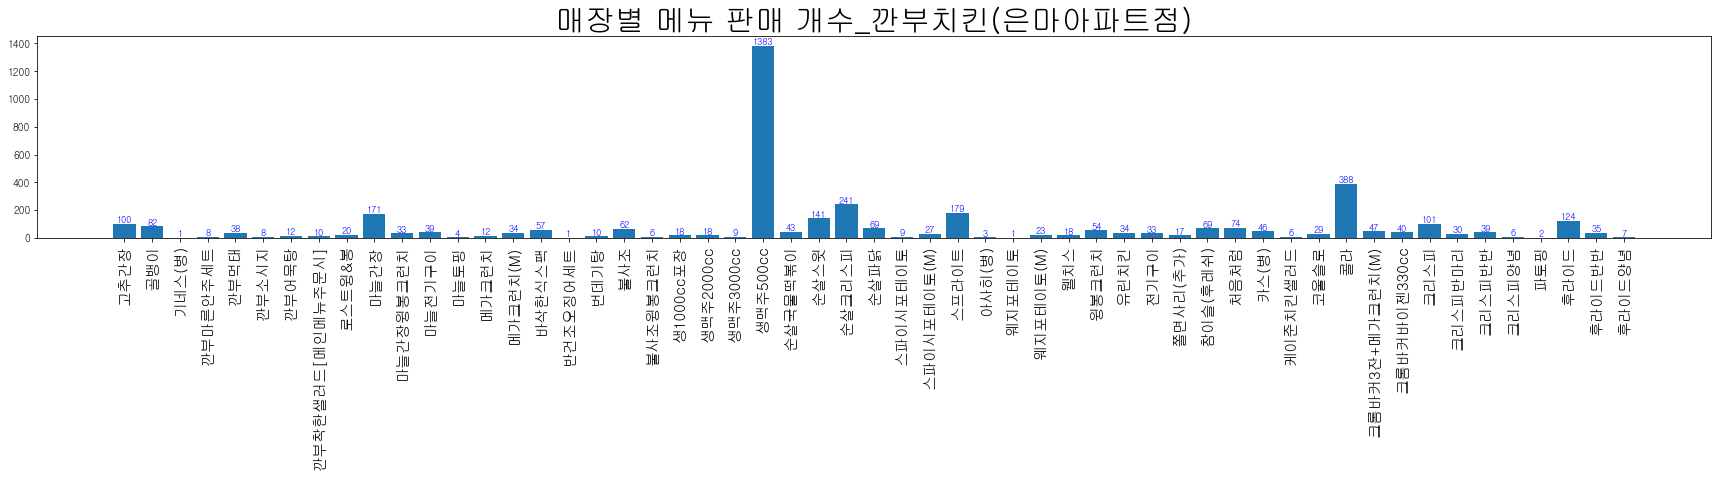

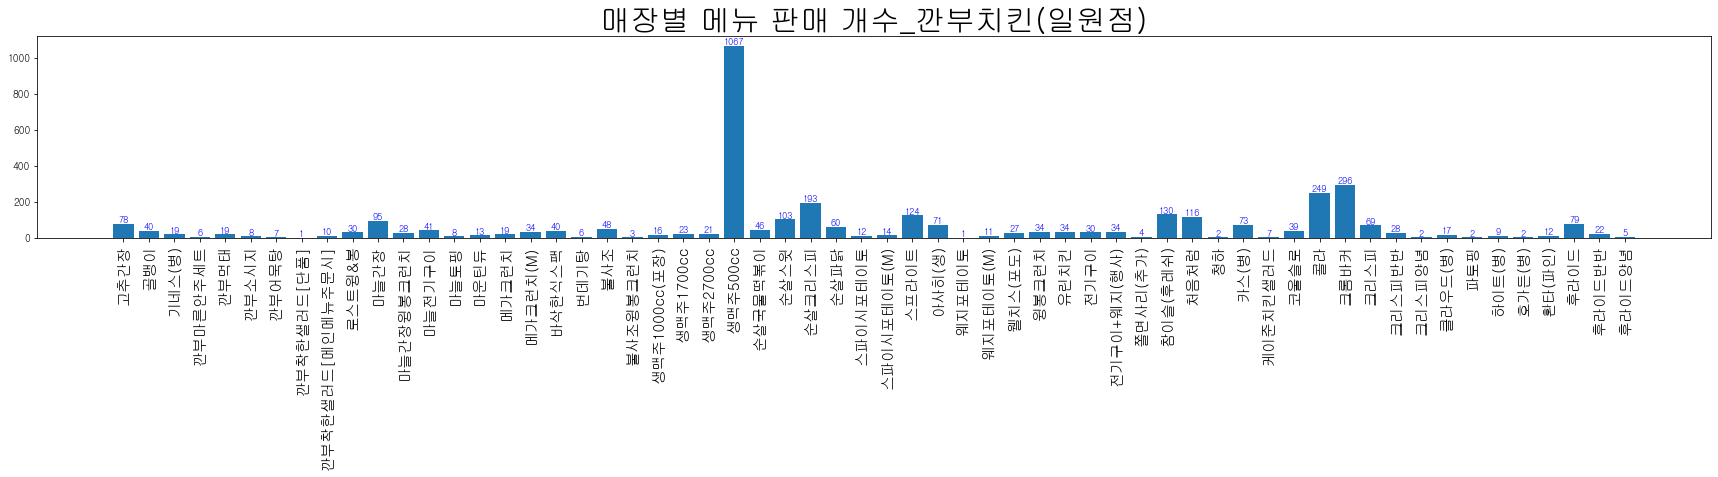

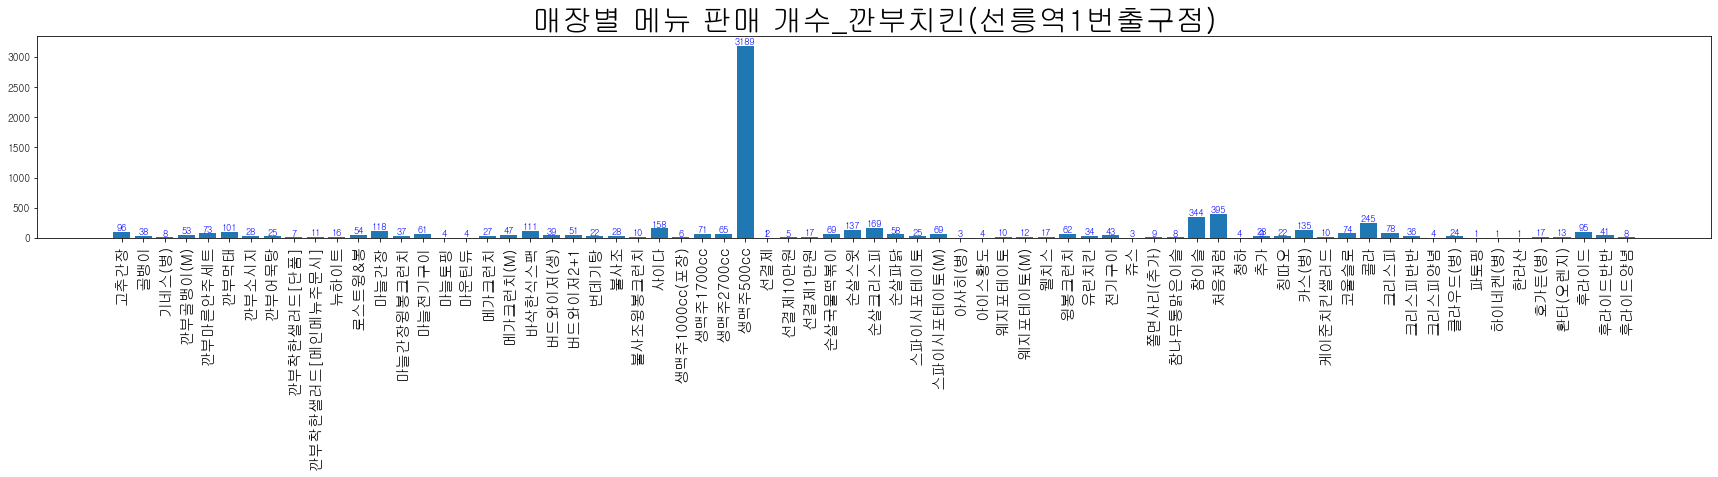

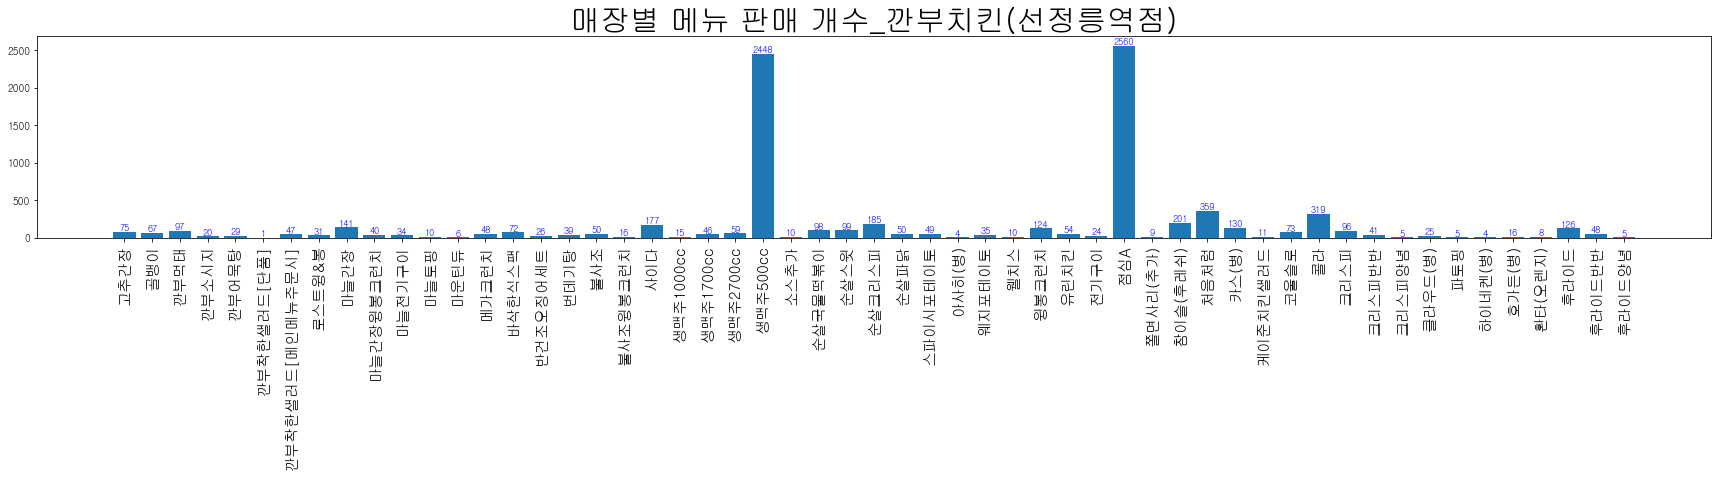

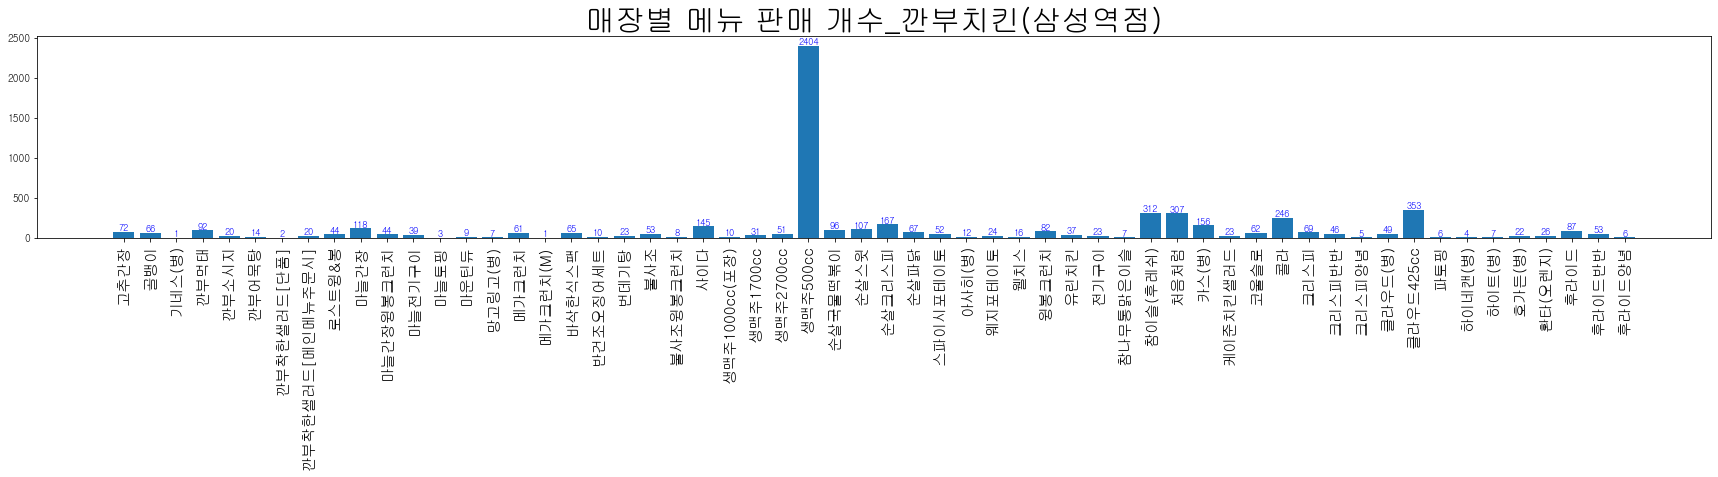

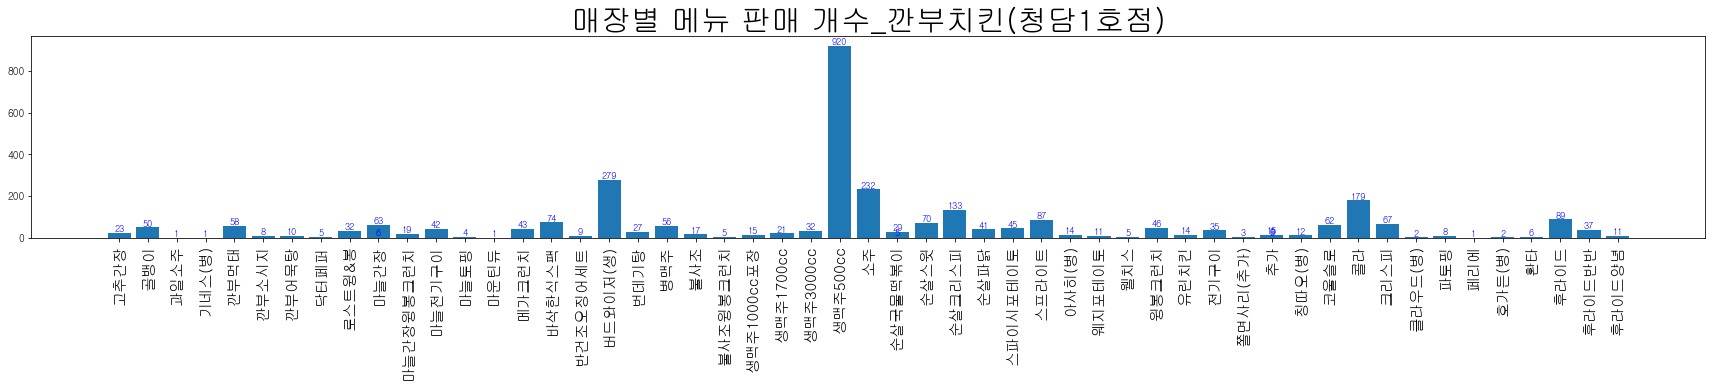

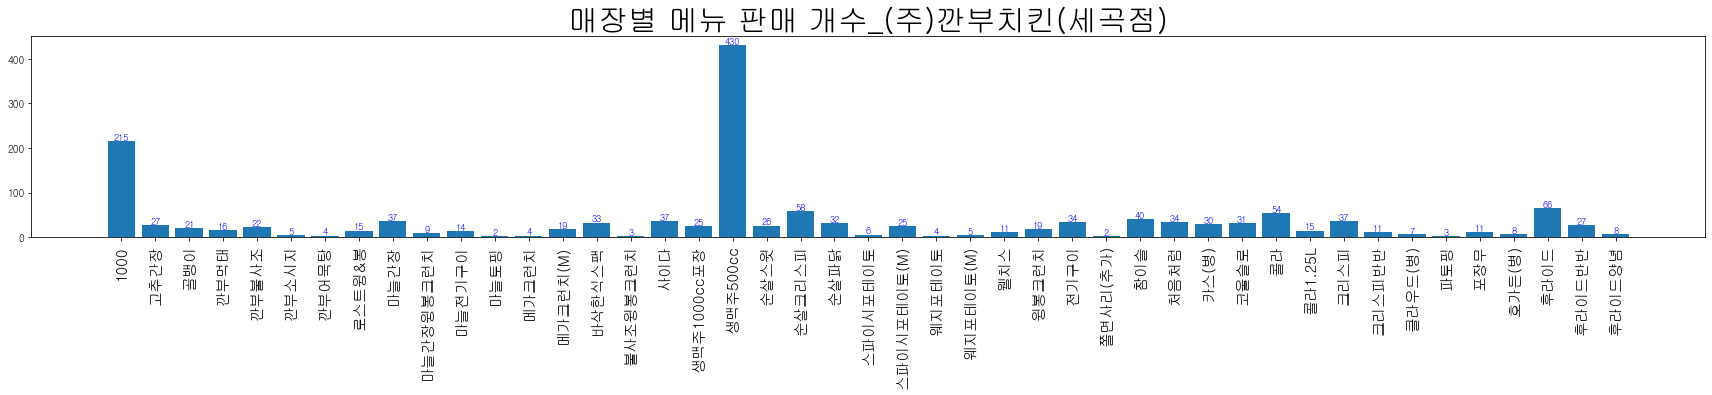

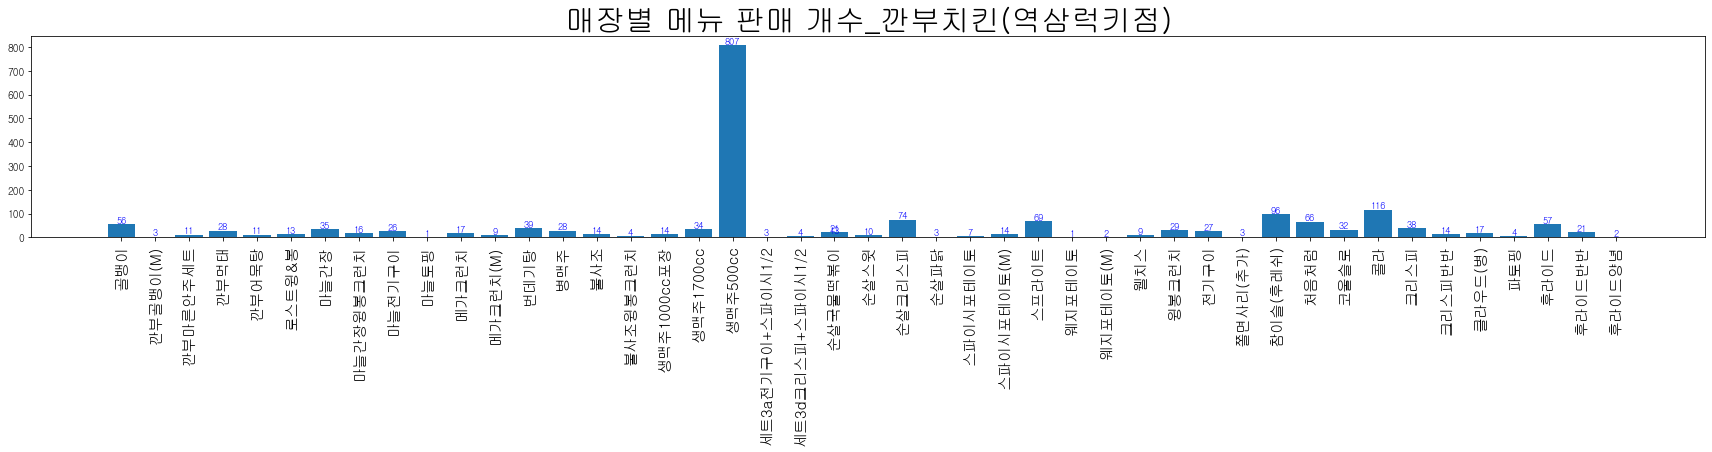

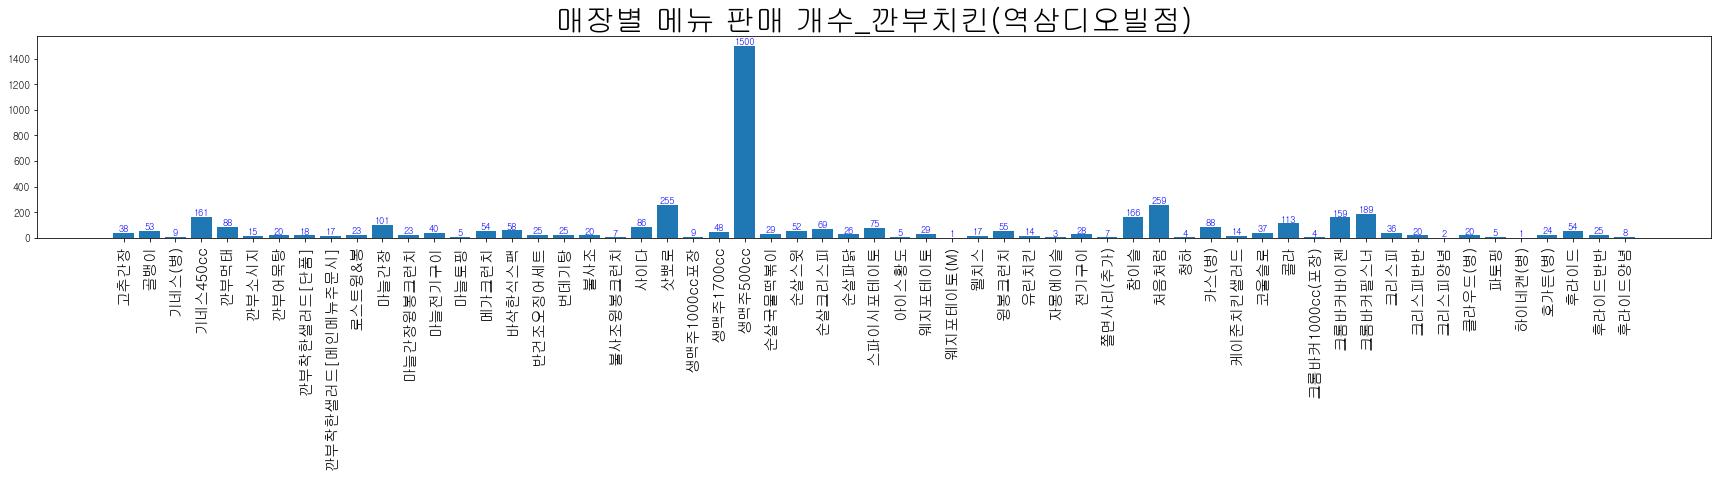

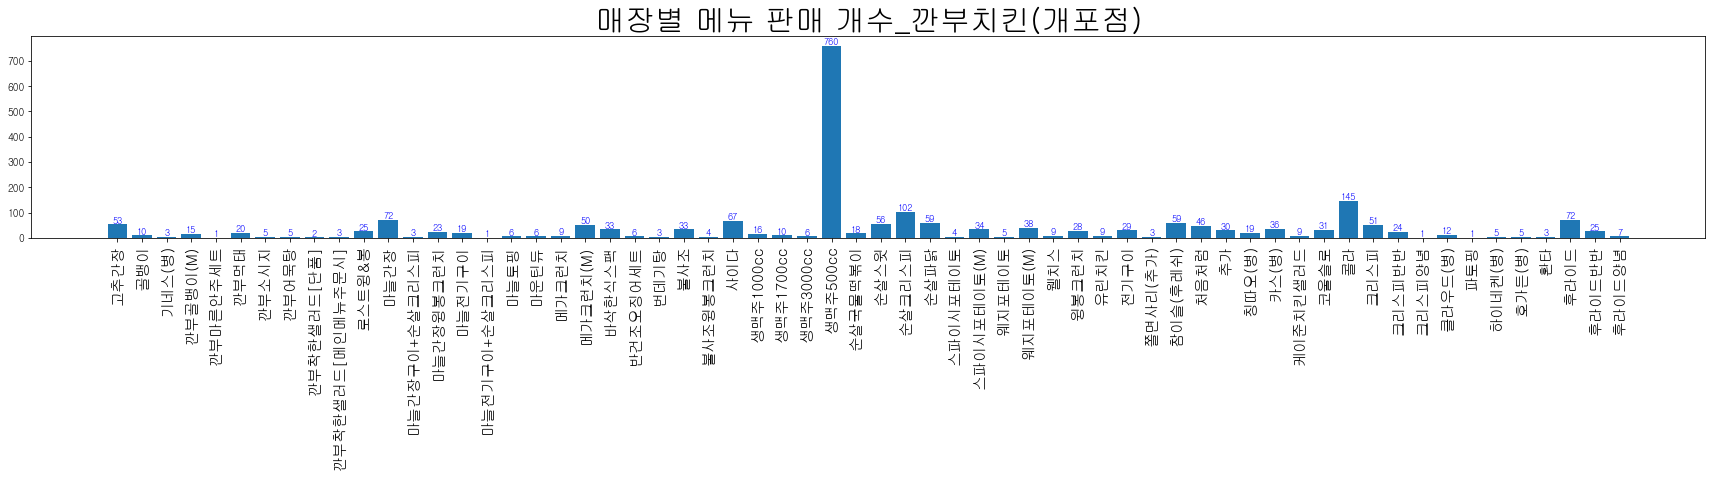

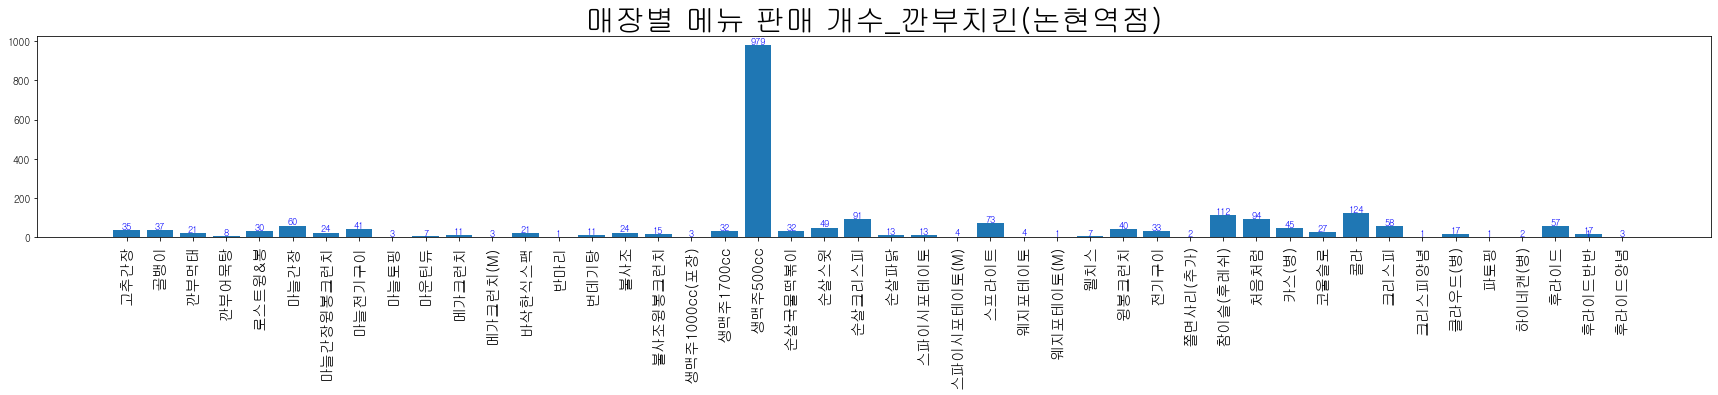

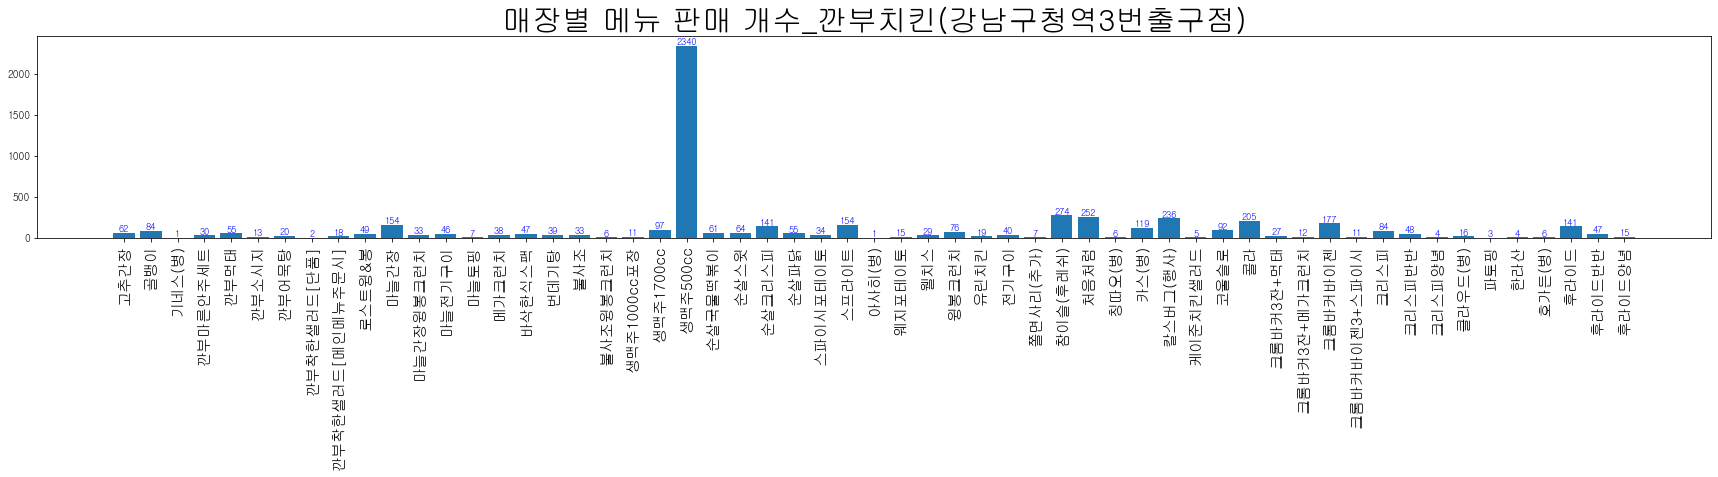

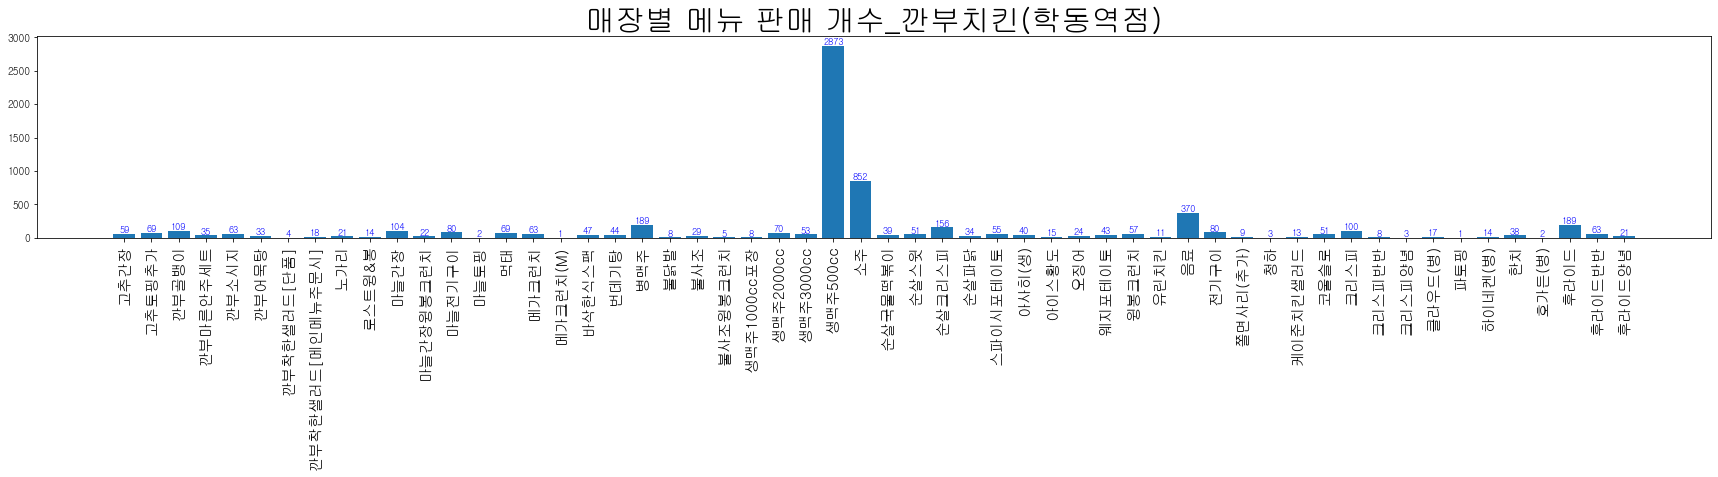

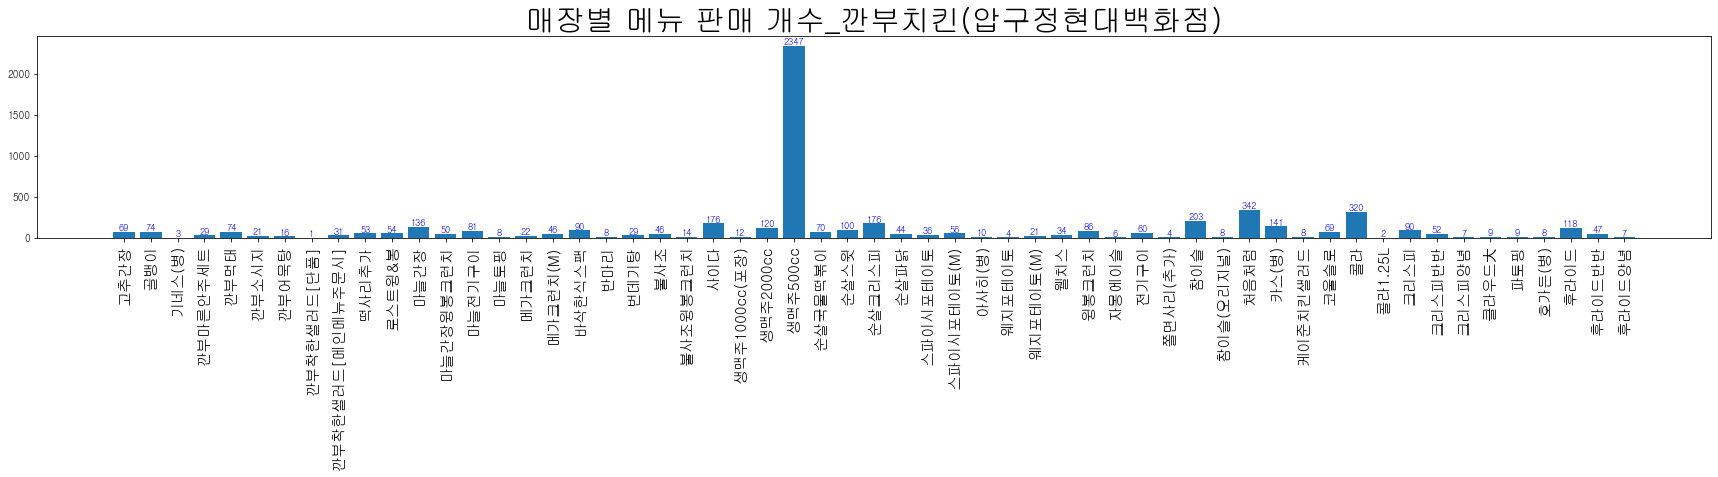

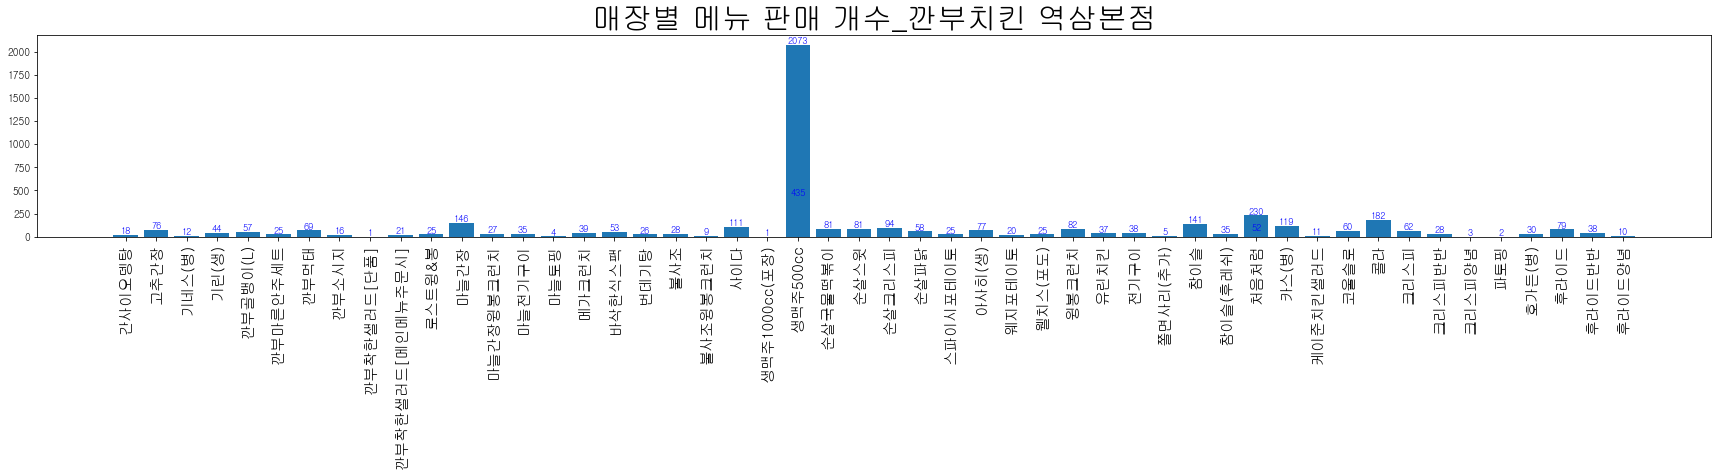

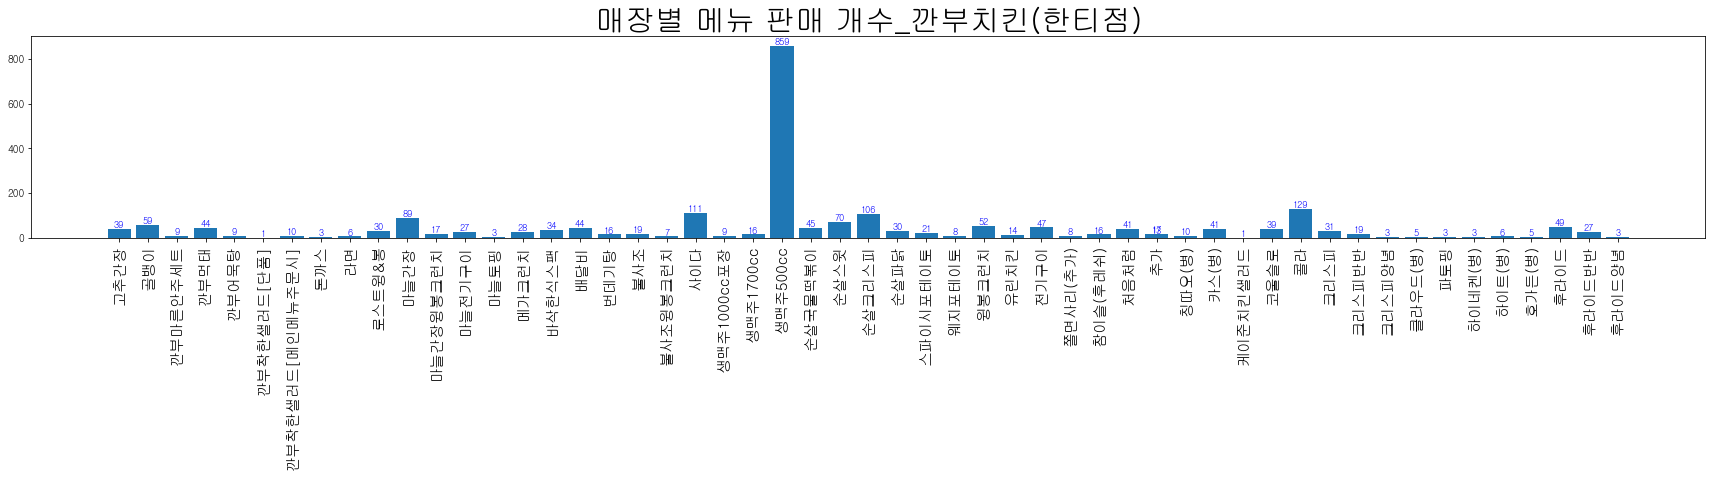

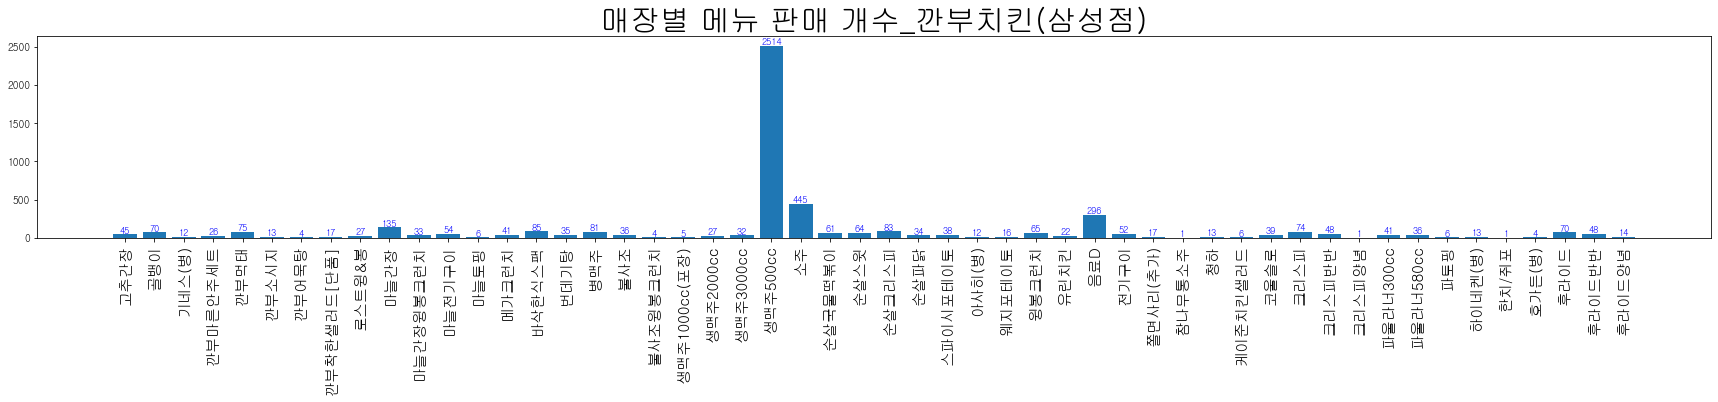

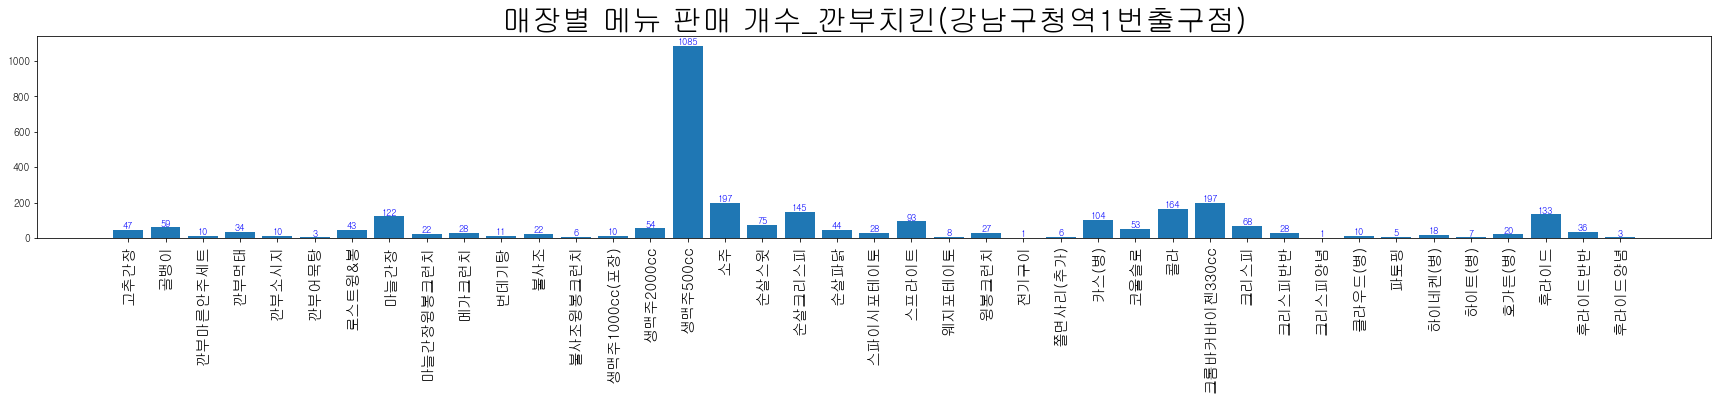

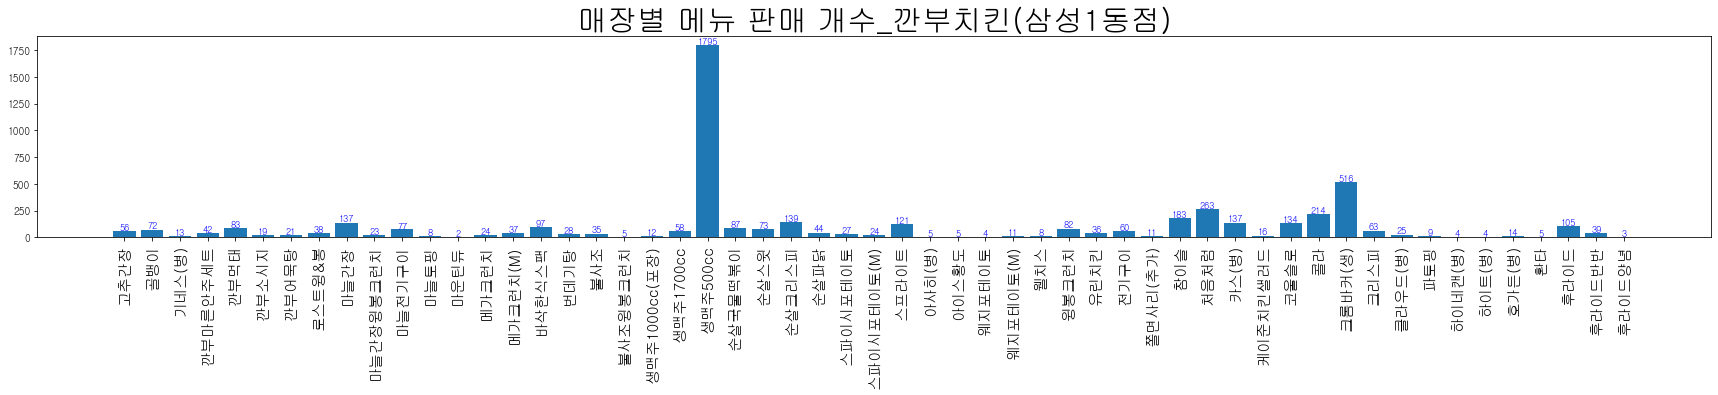

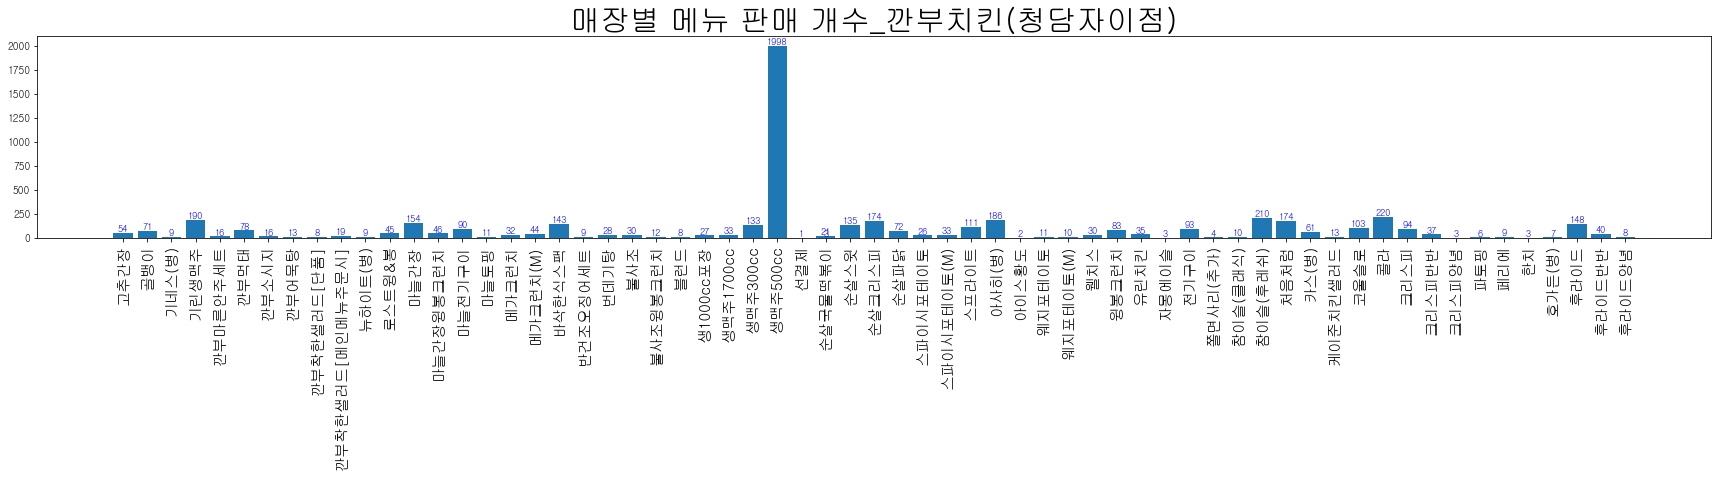

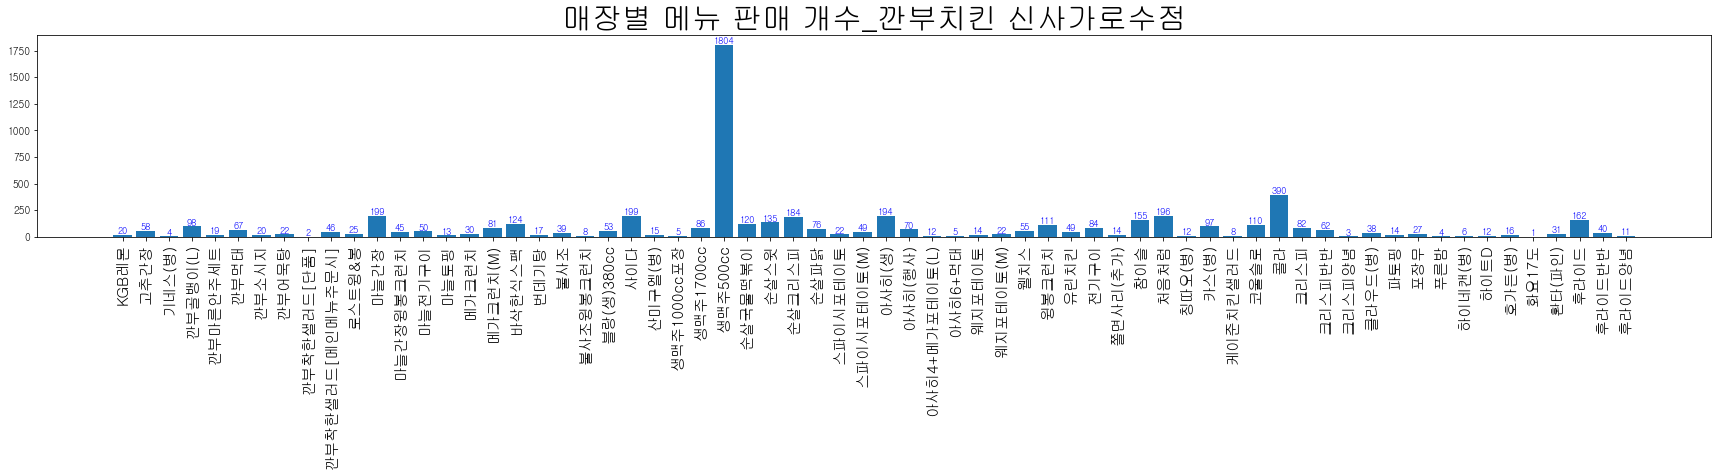

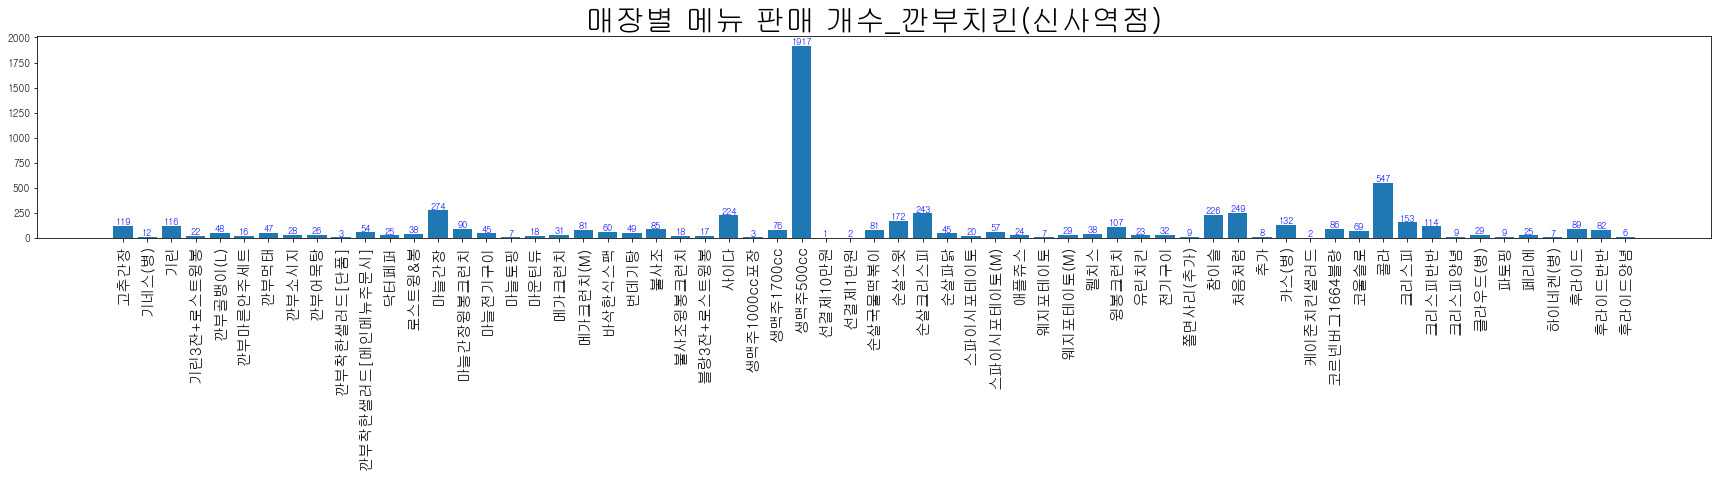

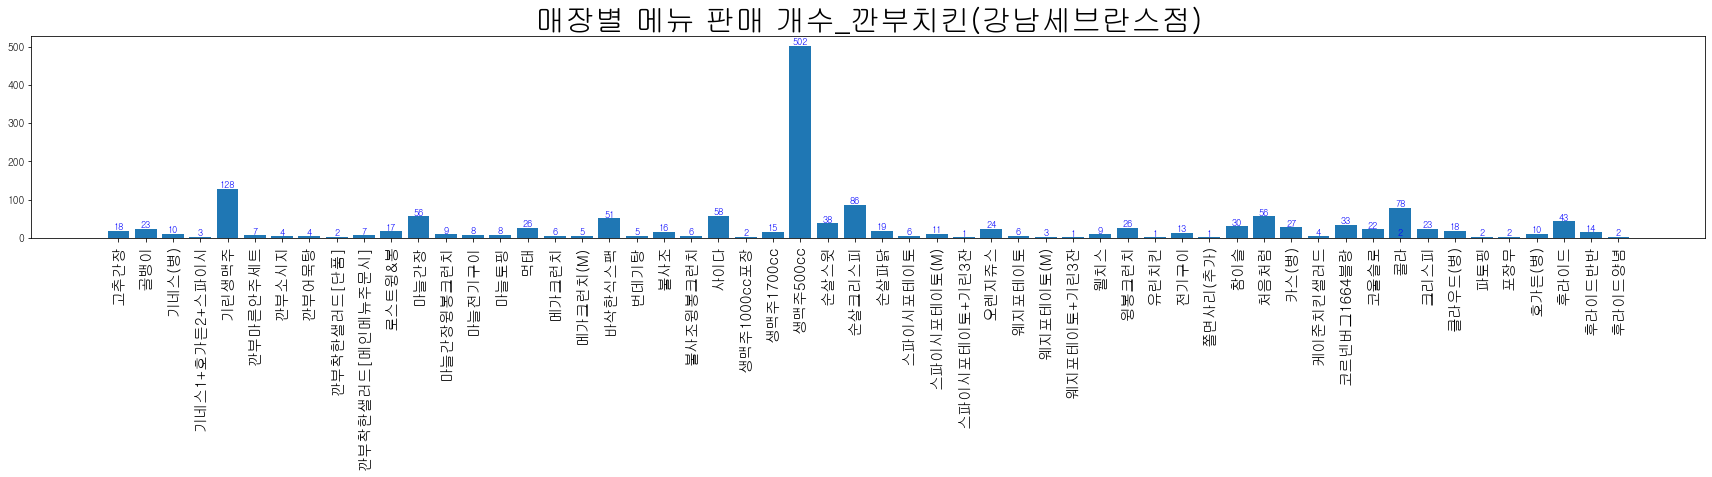

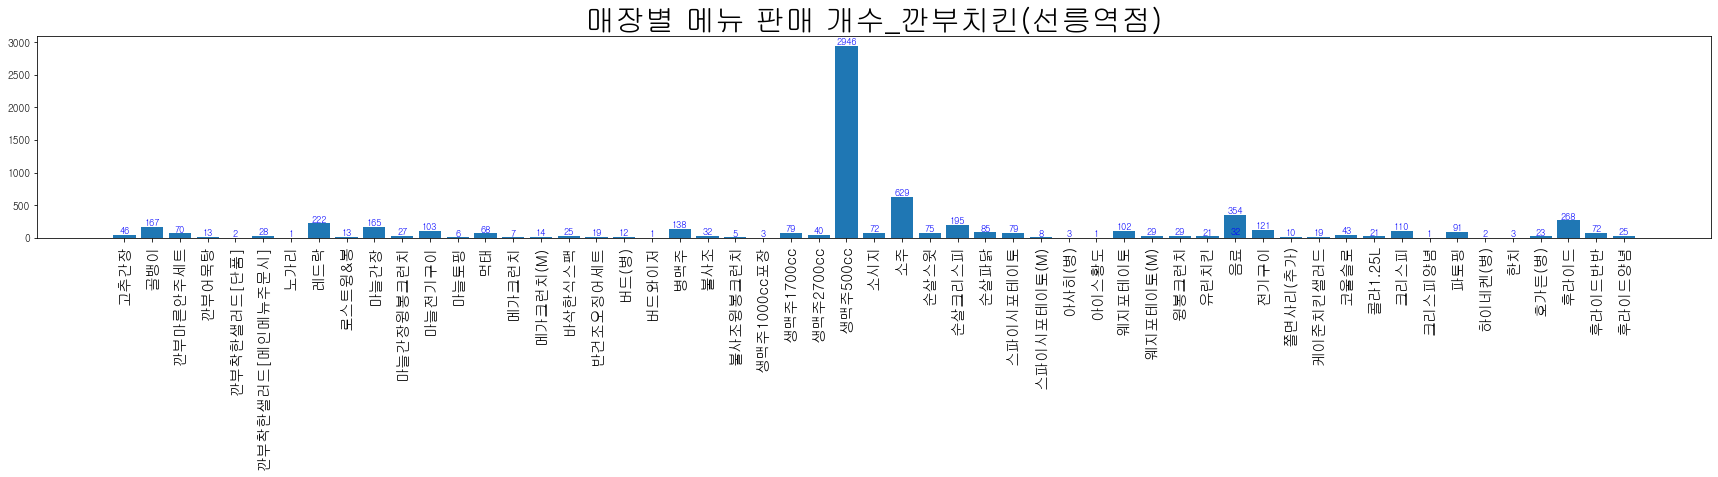

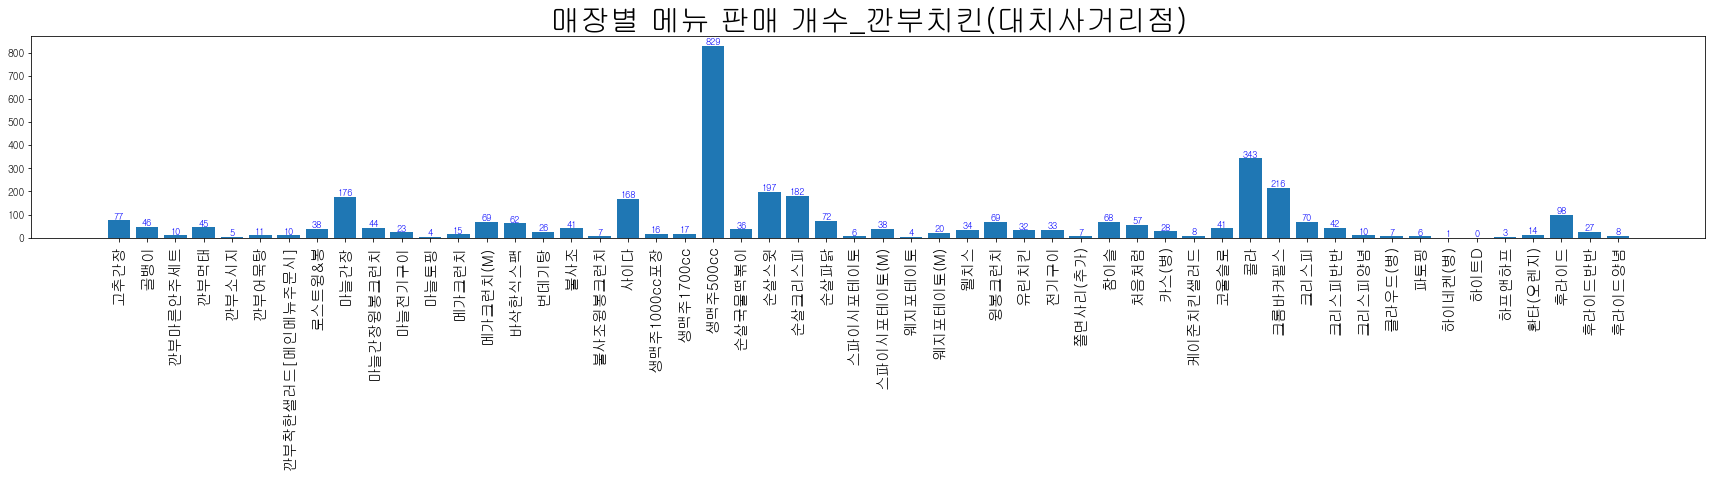

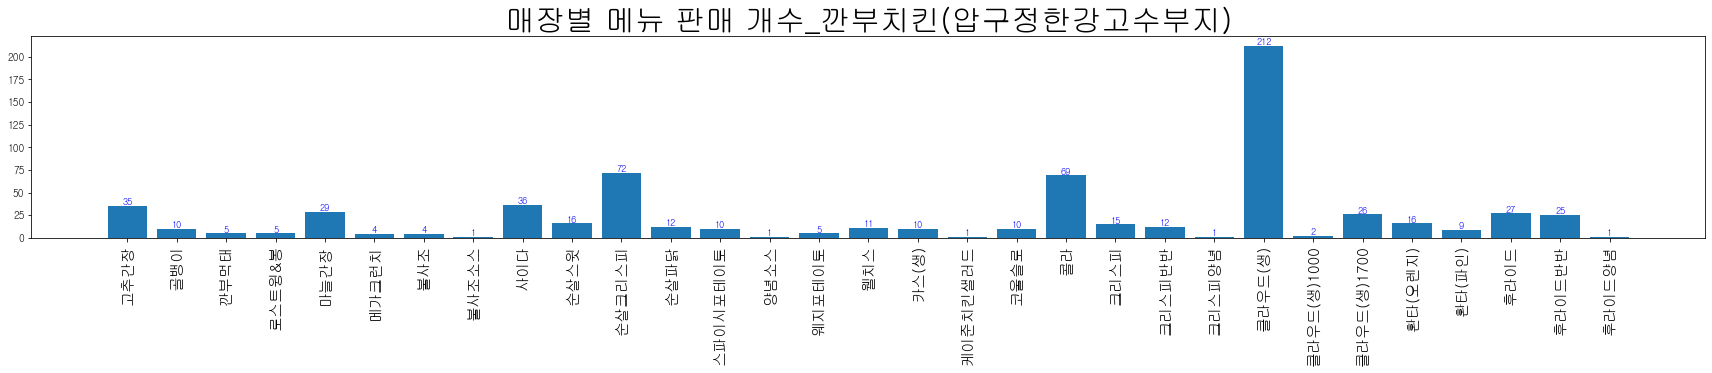

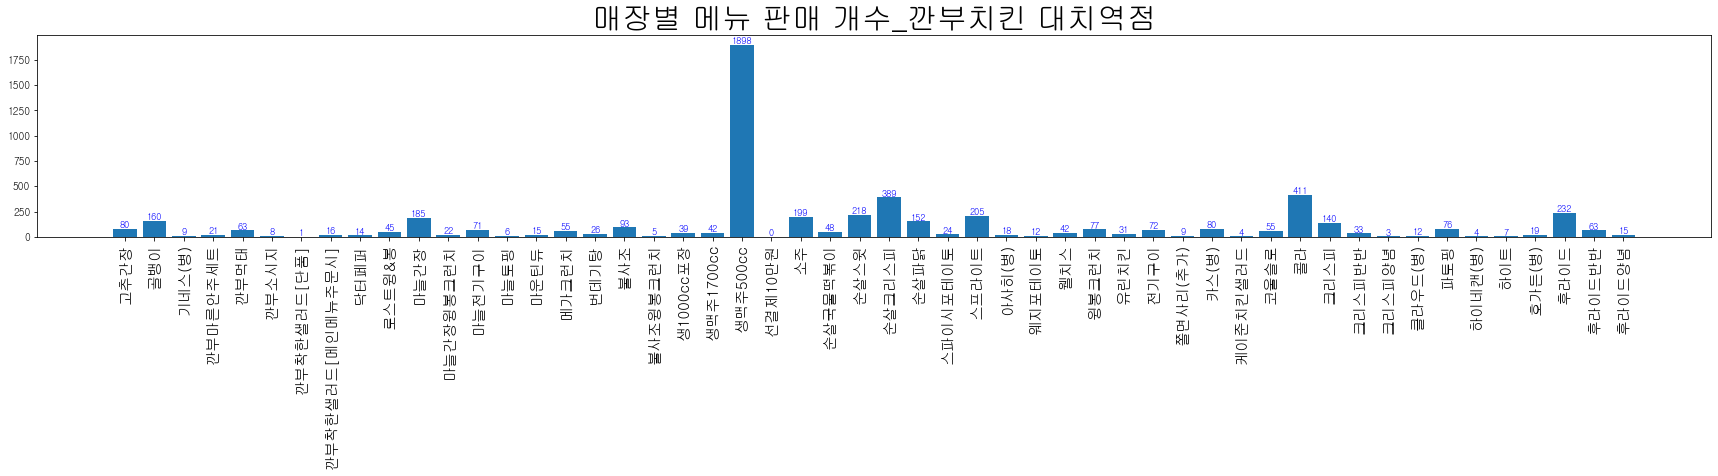

In [51]:
# 각 데이터 컬럼마다 데이터 빈도수 확인
from collections import Counter

#warning 메세지 제거
import warnings
warnings.filterwarnings("ignore")

#매장별 메뉴 판매 개수 바 플롯
CD = list(set(menu_store_count['매장코드']))
for cd in CD:  
    name = menu_store_count[menu_store_count['매장코드']==cd]["매장명"].values[0]
    barPlot(name, "매장별 메뉴 판매 개수", list(menu_store_count[menu_store_count['매장코드'] == cd]["상품명"]), list(menu_store_count[menu_store_count['매장코드'] == cd]["판매개수"]))


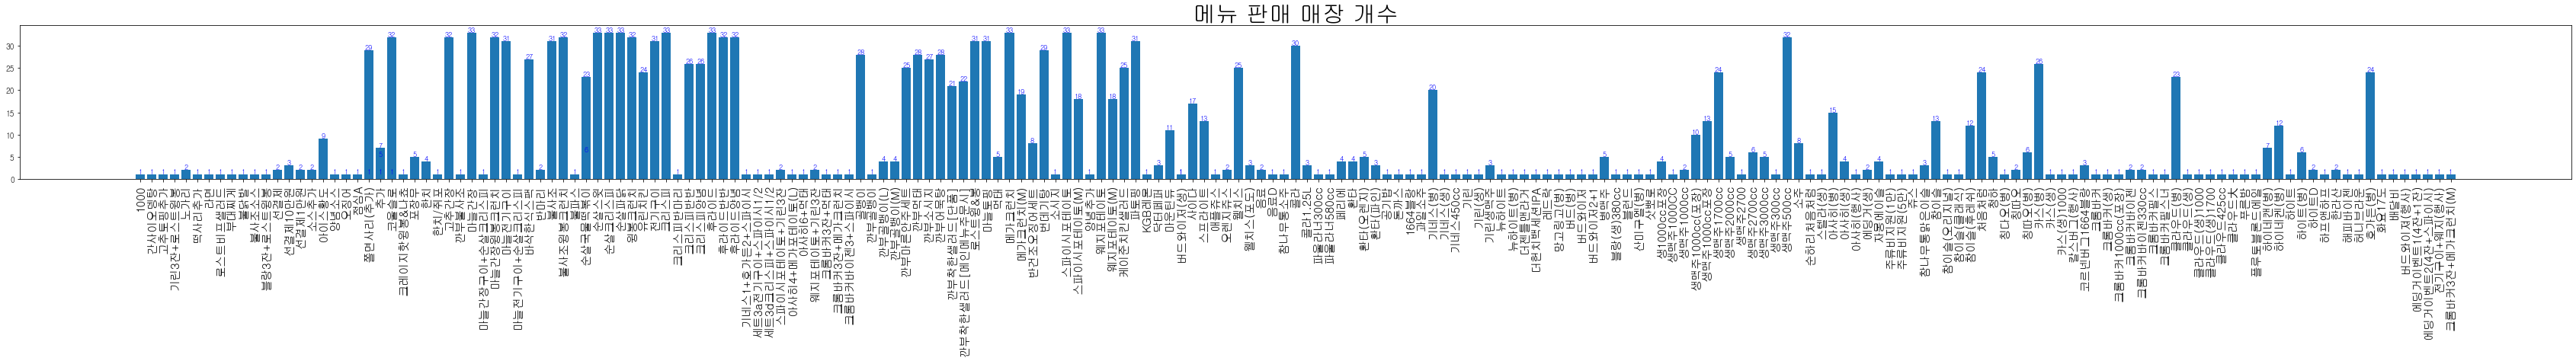

In [44]:
barPlot("", "메뉴 판매 매장 개수", list(store_count["상품명"]), list(store_count["판매매장"]))

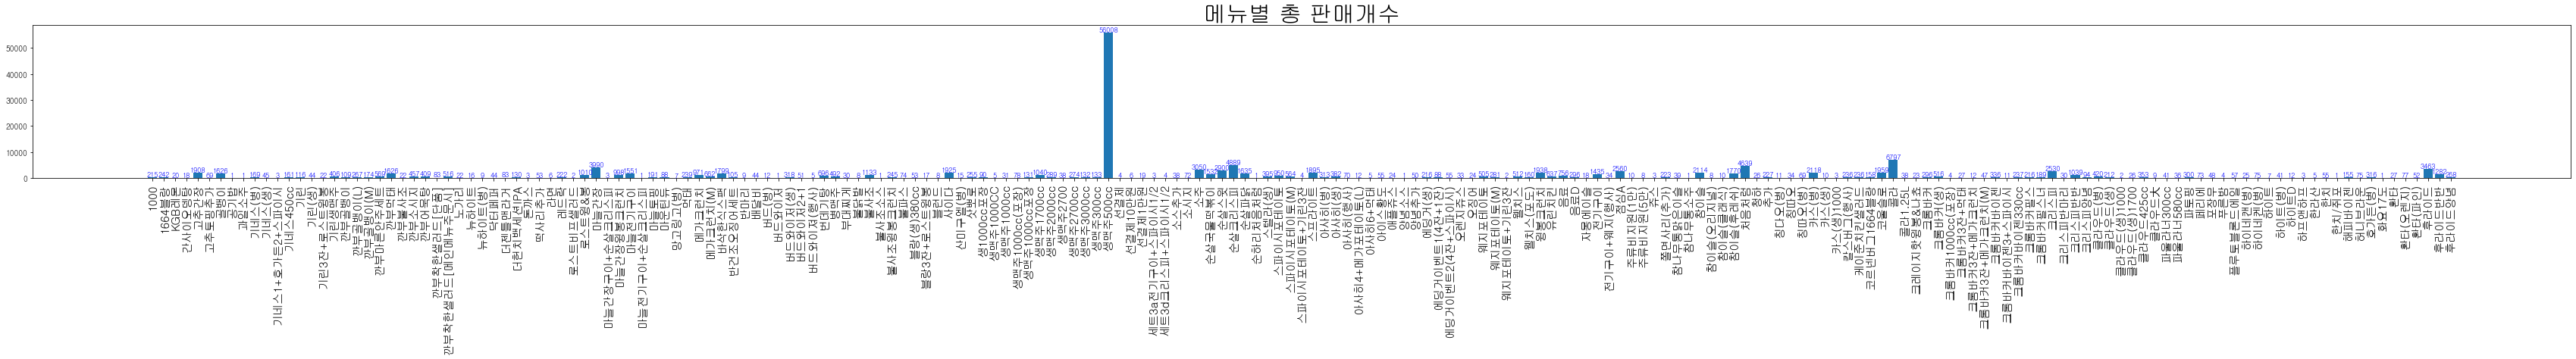

In [45]:
barPlot("", "메뉴별 총 판매개수", list(menu_whole_count["상품명"]), list(menu_whole_count["총판매개수"]))